## Experiments and Results

In [1]:
import json
import os
import matplotlib.pyplot as plt

### Coin-Heaven Scenario

In [51]:
# extract total 'coins' and 'invalid' moves from "by_agent"
def extract_coins_and_invalid_from_agent(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        
        # Access the 'by_agent' section
        agent_data = data.get("by_agent", {})
        
        # We assume there's a key for the agent (like "peaceful_agent")
        if agent_data:
            # Extract the first (and possibly only) agent's data
            agent_info = next(iter(agent_data.values()))
            
            # Extract 'coins', and handle 'invalid' if it exists
            total_coins = agent_info.get("coins", 0)
            total_invalid_moves = agent_info.get("invalid", 0) 
            
            return total_coins, total_invalid_moves
        return 0, 0  # Return defaults if no agent data is found

In [52]:
# Function to process multiple json files
def process_json_files(directory_path):
    all_data = {}

    # Iterate over each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            total_coins, total_invalid_moves = extract_coins_and_invalid_from_agent(file_path)
            
            # Store the total coins and invalid moves for each file
            all_data[filename] = {
                "total_coins": total_coins,
                "total_invalid_moves": total_invalid_moves
            }
    
    return all_data

In [53]:
directory_path = './results/coin-heaven'
total_rounds = 500
extracted_data = process_json_files(directory_path)
agents = ['meister_eckhart', ' random_agent', 'peaceful_agent', 'coin_collector_agent', 'rule_based_agent']
average_coins = []
average_invalid_moves = []

# Print or store the results
for file, data in extracted_data.items():
    print(f"File: {file}")
    print(f"  Average Number of Collected Coins: {data['total_coins'] / total_rounds}")
    average_coins.append(data['total_coins'] / total_rounds)
    if data["total_invalid_moves"] is not None:
        print(f"  Average Number of Invalid Moves: {data['total_invalid_moves'] / total_rounds}")
        average_invalid_moves.append(data['total_invalid_moves'] / total_rounds)
    else:
        print(f"  Total Invalid Moves: Not available")


File: meister_eckhart_coin_heaven_500_with_exploration.json
  Average Number of Collected Coins: 36.686
  Average Number of Invalid Moves: 9.474
File: random_agent_coin_heaven_500.json
  Average Number of Collected Coins: 1.792
  Average Number of Invalid Moves: 9.044
File: peaceful_agent_coin_heaven_500.json
  Average Number of Collected Coins: 18.576
  Average Number of Invalid Moves: 149.12
File: coin_collector_agent_coin_heaven_500.json
  Average Number of Collected Coins: 50.0
  Average Number of Invalid Moves: 0.0
File: rule_based_agent_coin_heaven_500.json
  Average Number of Collected Coins: 50.0
  Average Number of Invalid Moves: 0.0


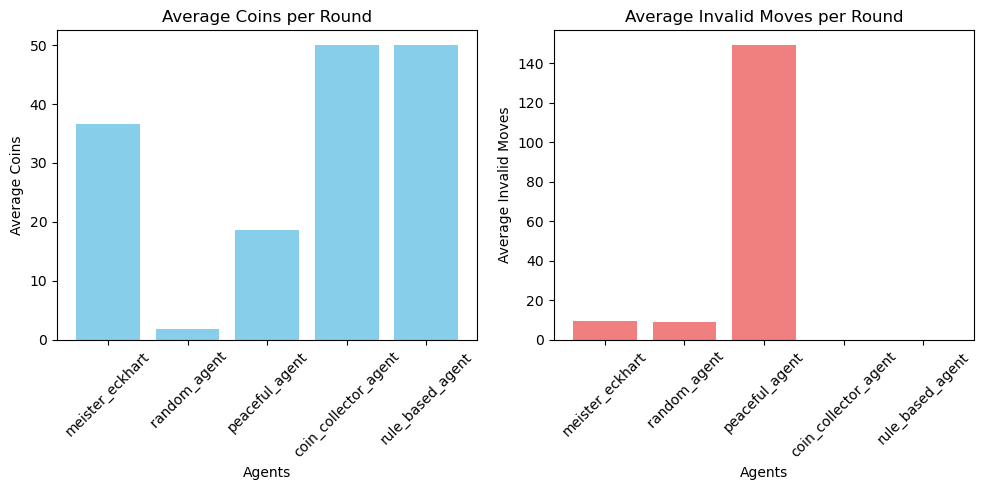

In [54]:
# Create a bar plot for average coins
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot for average coins
plt.bar(agents, average_coins, color='skyblue')
plt.title('Average Coins per Round')
plt.xlabel('Agents')
plt.ylabel('Average Coins')
plt.xticks(rotation=45)

# Create a bar plot for average invalid moves
plt.subplot(1, 2, 2)  # Second subplot for average invalid moves
plt.bar(agents, average_invalid_moves, color='lightcoral')
plt.title('Average Invalid Moves per Round')
plt.xlabel('Agents')
plt.ylabel('Average Invalid Moves')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

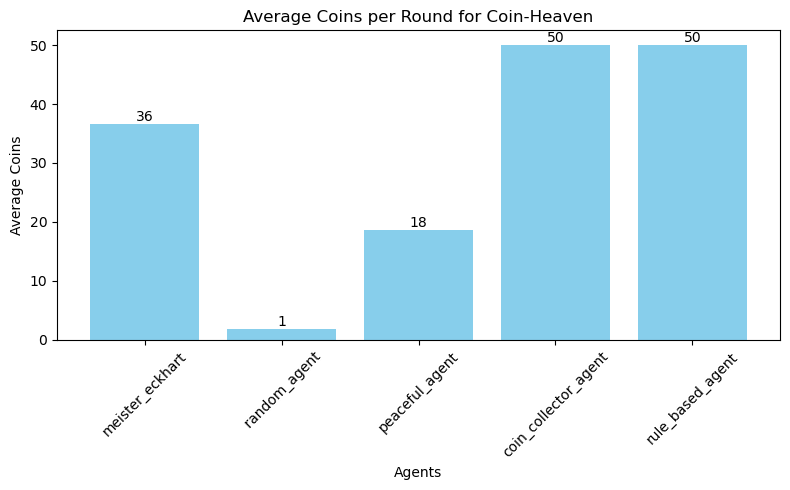

In [55]:
# Average Coins per Round
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_coins, color='skyblue')
plt.title('Average Coins per Round for Coin-Heaven')
plt.xlabel('Agents')
plt.ylabel('Average Coins')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/coin-heaven/average_coins_per_round_coin_heaven.png', dpi=300)  # Save the figure with high resolution
plt.show()

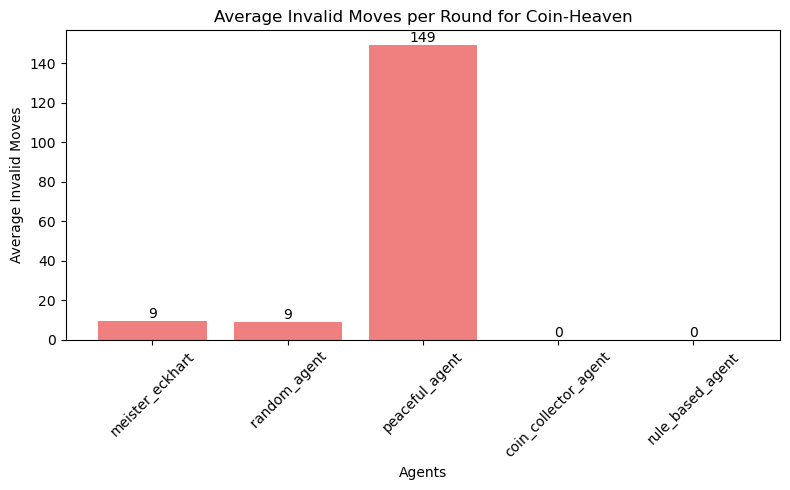

In [56]:
#Average Invalid Moves per Round
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_invalid_moves, color='lightcoral')
plt.title('Average Invalid Moves per Round for Coin-Heaven')
plt.xlabel('Agents')
plt.ylabel('Average Invalid Moves')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/coin-heaven/average_invalid_moves_per_round_coin_heaven.png', dpi=300)  # Save the figure with high resolution
plt.show()

### Loot-Crate Scenario

In [2]:
def extract_agent_data(file_path):
    """
    Extracts 'coins', 'invalid', 'crates', 'score', and 'steps' from a given JSON file.

    Parameters:
        file_path (str): The path to the JSON file.

    Returns:
        dict: A dictionary containing the extracted values, or None if the file is invalid.
    """
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            agent_data = data.get("by_agent", {})
            agent_info = next(iter(agent_data.values()))
            
            # Extract required fields
            coins = agent_info.get("coins", 0)
            invalid = agent_info.get("invalid", 0)
            crates = agent_info.get("crates", 0)
            score = agent_info.get("score", 0)
            steps = agent_info.get("steps", 0)

            return {
                "coins": coins,
                "invalid": invalid,
                "crates": crates,
                "score": score,
                "steps": steps
            }
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None


In [3]:
def process_json_files_loot_crate(directory_path):
    all_data = {}

    # Iterate over each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            data = extract_agent_data(file_path)
            
            all_data[filename] = data
    return all_data

In [4]:
directory_path = './results/loot-crate'
total_rounds = 500
extracted_data = process_json_files_loot_crate(directory_path)
average_coins = []
average_invalid_moves = []
average_score = []
average_destroyed_crates = []
average_steps_alive = []

# Print or store the results
for file, data in extracted_data.items():
    print(f"File: {file}")
    print(f"  Average Number of Collected Coins: {data['coins'] / total_rounds}")
    average_coins.append(data['coins'] / total_rounds)
    if data["invalid"] is not None:
        print(f"  Average Number of Invalid Moves: {data['invalid'] / total_rounds}")
        average_invalid_moves.append(data['invalid'] / total_rounds)
    else:
        print(f"  Total Invalid Moves: Not available")
    average_score.append(data['score'] / total_rounds)
    print(f"  Average Score: {data['score'] / total_rounds}")
    average_destroyed_crates.append(data['crates'] / total_rounds)
    print(f"  Average Destroyed Crates: {data['crates'] / total_rounds}")
    average_steps_alive.append(data['steps'] / total_rounds)
    print(f"  Average Steps Alive: {data['steps'] / total_rounds}")
    print()


File: peaceful_agent_loot_crate_500.json
  Average Number of Collected Coins: 0.0
  Average Number of Invalid Moves: 255.586
  Average Score: 0.0
  Average Destroyed Crates: 0.0
  Average Steps Alive: 400.0

File: random_agent_loot_crate_500.json
  Average Number of Collected Coins: 0.01
  Average Number of Invalid Moves: 11.172
  Average Score: 0.01
  Average Destroyed Crates: 2.91
  Average Steps Alive: 18.148

File: rule_based_agent_loot_crate_500.json
  Average Number of Collected Coins: 43.234
  Average Number of Invalid Moves: 2.046
  Average Score: 43.234
  Average Destroyed Crates: 107.606
  Average Steps Alive: 400.0

File: meister_eckhart_loot_crate_500.json
  Average Number of Collected Coins: 0.0
  Average Number of Invalid Moves: 5.098
  Average Score: 0.0
  Average Destroyed Crates: 2.76
  Average Steps Alive: 100.576

File: coin_collector_agent_loot_crate_500.json
  Average Number of Collected Coins: 43.308
  Average Number of Invalid Moves: 1.952
  Average Score: 43.308

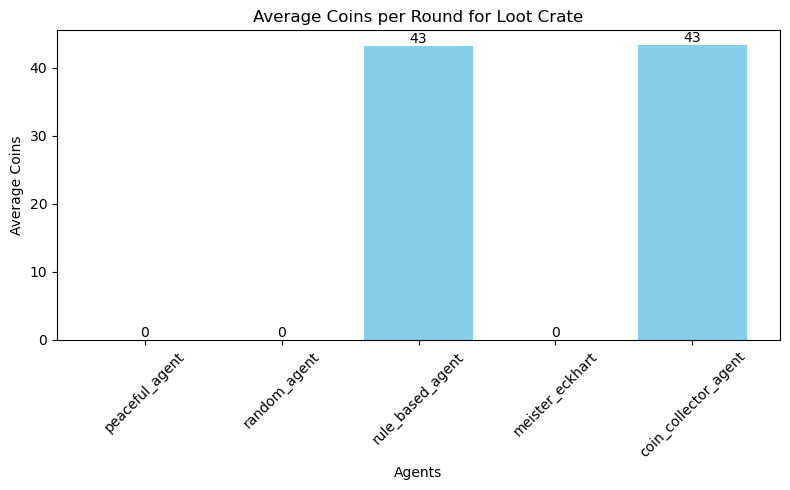

In [5]:
# Average Coins per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_coins, color='skyblue')
plt.title('Average Coins per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Coins')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_coins_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

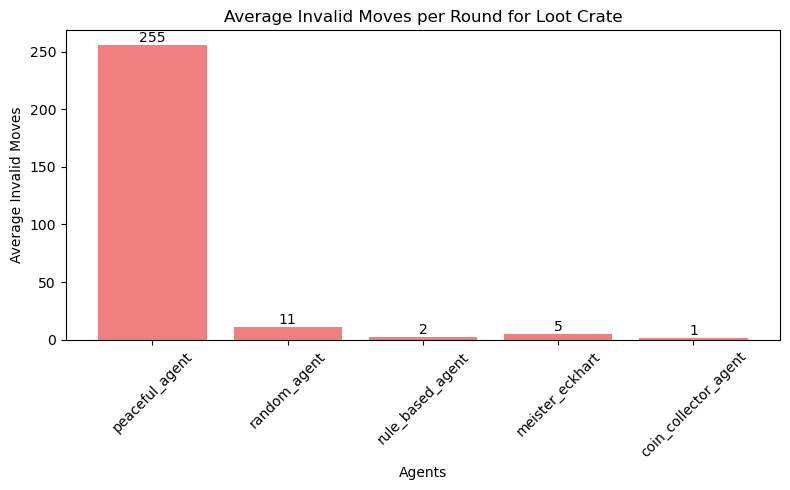

In [6]:
#Average Invalid Moves per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_invalid_moves, color='lightcoral')
plt.title('Average Invalid Moves per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Invalid Moves')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_invalid_moves_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

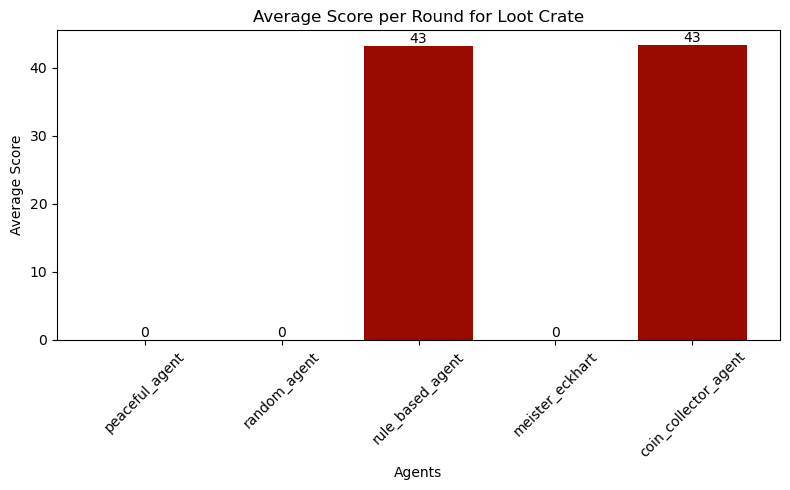

In [7]:
#Average Score per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_score, color='#990B00')
plt.title('Average Score per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_score_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

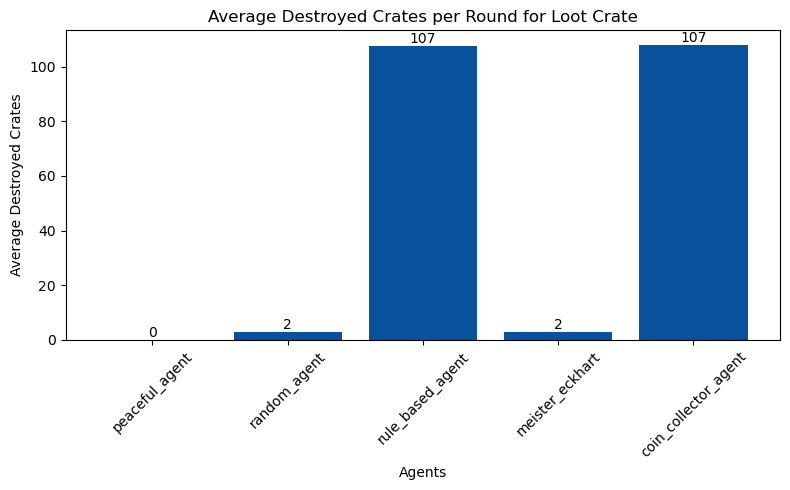

In [8]:
#Average Destroyed Crates per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_destroyed_crates, color='#08519C')
plt.title('Average Destroyed Crates per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Destroyed Crates')
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_destroyed_crates_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

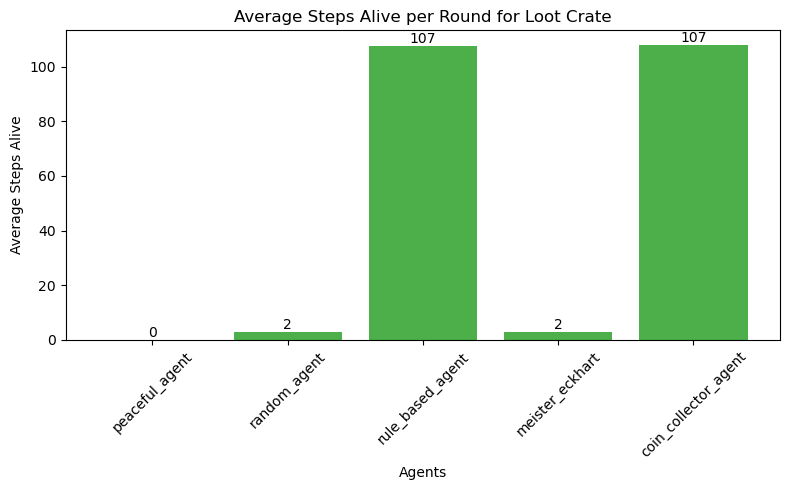

In [9]:
#Average Steps Alive per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_destroyed_crates, color='#4DAF4A')
plt.title('Average Steps Alive per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Steps Alive')
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_steps_alive_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()